## Problem Statement
The goal of this project is to predict medical conditions based on patient reviews of drugs. Leveraging natural language processing (NLP) techniques and machine learning algorithms, the aim is to develop a model that can accurately classify medical conditions from the content of patient reviews

## Dataset 
   1. **DrugName:** This column contains the name of the drug that the review is about. It's a categorical variable.
   2. **Condition:** This column specifies the medical condition for which the drug was taken. It's also a categorical variable.
   3. **Review:** The review column contains the text of the patient review. This text provides insights into the patient's experience with the drug, including its effectiveness, side effects, and overall satisfaction.
   4. **Rating:** This numerical column represents the rating given by the patient, usually on a scale of 1 to 10, reflecting their overall satisfaction with the drug.
   5. **Date:** The date column indicates the date when the review was submitted or entered into the dataset.
   6. **UsefulCount:** This numerical column denotes the number of users who found the review helpful or useful.

## Importing The Required Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('CSV/drugsComTrain_raw.tsv', sep='\t')

In [3]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [4]:
df.tail()

Unnamed: 0            drugName              condition  \
161292      191035             Campral     Alcohol Dependence   
161293      127085      Metoclopramide        Nausea/Vomiting   
161294      187382             Orencia   Rheumatoid Arthritis   
161295       47128  Thyroid desiccated    Underactive Thyroid   
161296      215220        Lubiprostone  Constipation, Chronic   

                                                   review  rating  \
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  
161292        May 31, 2015          125  
161293    November 1, 2011           34  
161294      March 15, 2014           35  
161295  September 19, 2015           79  
161296   December 13, 2014          116

In [5]:
df.shape

(161297, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [7]:
df.drop("Unnamed: 0",axis=True,inplace=True)

In [8]:
df.head()

drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

## Checking For Null and Duplicate Values

In [9]:
df.isnull().sum()

drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.shape

(160398, 6)

In [12]:
df.isnull().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [13]:
df.duplicated().sum()

0

## Statistical Information

In [14]:
df.describe()

rating    usefulCount
count  160398.000000  160398.000000
mean        6.995923      28.097613
std         3.272303      36.457876
min         1.000000       0.000000
25%         5.000000       6.000000
50%         8.000000      16.000000
75%        10.000000      36.000000
max        10.000000    1291.000000

## EDA

In [15]:
df.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'], dtype='object')

In [16]:
df_typ = [] 
for i in df.columns:
    if df[i].dtypes == 'object':
        df_typ.append(i)  
print(df_typ)

['drugName', 'condition', 'review', 'date']


In [17]:
df['drugName'].value_counts()

drugName
Levonorgestrel                                                                                      3631
Etonogestrel                                                                                        3321
Ethinyl estradiol / norethindrone                                                                   2750
Nexplanon                                                                                           2156
Ethinyl estradiol / norgestimate                                                                    2033
Ethinyl estradiol / levonorgestrel                                                                  1809
Phentermine                                                                                         1538
Sertraline                                                                                          1353
Escitalopram                                                                                        1287
Mirena                                        

In [18]:
df['condition'].value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [19]:
df_new = df[(df['condition']=='Birth Control') | 
                 (df['condition']=='Depression') | 
                 (df['condition']=='High Blood Pressure') |
                 (df['condition']=='Anxiety')|
                 (df['condition']=='Weight Loss')|
                 (df['condition']=='Diabetes, Type 2')]

In [20]:
df_new.shape

(52245, 6)

In [21]:
df1 = df_new.copy()

In [22]:
df1.head()

drugName      condition  \
2                               Lybrel  Birth Control   
3                           Ortho Evra  Birth Control   
9   Ethinyl estradiol / levonorgestrel  Birth Control   
11                      L-methylfolate     Depression   
14                           Nexplanon  Birth Control   

                                               review  rating  \
2   "I used to take another oral contraceptive, wh...     5.0   
3   "This is my first time using any form of birth...     8.0   
9   "I had been on the pill for many years. When m...     8.0   
11  "I have taken anti-depressants for years, with...    10.0   
14  "Started Nexplanon 2 months ago because I have...     3.0   

                 date  usefulCount  
2   December 14, 2009           17  
3    November 3, 2015           10  
9    December 8, 2016            1  
11      March 9, 2017           54  
14     August 7, 2014           10

In [23]:
df1 = df1.drop(["rating","date","usefulCount"],axis=1)

In [24]:
df1.head()

drugName      condition  \
2                               Lybrel  Birth Control   
3                           Ortho Evra  Birth Control   
9   Ethinyl estradiol / levonorgestrel  Birth Control   
11                      L-methylfolate     Depression   
14                           Nexplanon  Birth Control   

                                               review  
2   "I used to take another oral contraceptive, wh...  
3   "This is my first time using any form of birth...  
9   "I had been on the pill for many years. When m...  
11  "I have taken anti-depressants for years, with...  
14  "Started Nexplanon 2 months ago because I have...

In [25]:
df1["condition"].value_counts()

condition
Birth Control          28788
Depression              9069
Anxiety                 5904
Weight Loss             3609
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: count, dtype: int64

In [26]:
df1["drugName"].value_counts()

drugName
Etonogestrel                                               3314
Ethinyl estradiol / norethindrone                          2337
Nexplanon                                                  2149
Levonorgestrel                                             2129
Ethinyl estradiol / levonorgestrel                         1600
Ethinyl estradiol / norgestimate                           1580
Phentermine                                                1211
Implanon                                                   1095
Mirena                                                      965
Escitalopram                                                864
Skyla                                                       822
Lexapro                                                     678
Lo Loestrin Fe                                              667
Ethinyl estradiol / etonogestrel                            631
NuvaRing                                                    620
Copper                         

## Data Pre-Processing

In [27]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [28]:
df1.head()

drugName      condition  \
2                               Lybrel  Birth Control   
3                           Ortho Evra  Birth Control   
9   Ethinyl estradiol / levonorgestrel  Birth Control   
11                      L-methylfolate     Depression   
14                           Nexplanon  Birth Control   

                                               review  
2   "I used to take another oral contraceptive, wh...  
3   "This is my first time using any form of birth...  
9   "I had been on the pill for many years. When m...  
11  "I have taken anti-depressants for years, with...  
14  "Started Nexplanon 2 months ago because I have...

In [181]:
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [30]:
df1['preprocessed_Review'] = df1['review'].apply(preprocess) 
df1.head()

drugName      condition  \
2                               Lybrel  Birth Control   
3                           Ortho Evra  Birth Control   
9   Ethinyl estradiol / levonorgestrel  Birth Control   
11                      L-methylfolate     Depression   
14                           Nexplanon  Birth Control   

                                               review  \
2   "I used to take another oral contraceptive, wh...   
3   "This is my first time using any form of birth...   
9   "I had been on the pill for many years. When m...   
11  "I have taken anti-depressants for years, with...   
14  "Started Nexplanon 2 months ago because I have...   

                                  preprocessed_Review  
2   oral contraceptive 21 pill cycle happy- light ...  
3   time form birth control i&#039;m glad go patch...  
9   pill year doctor change rx chateal effective h...  
11  take anti depressant year improvement moderate...  
14  Started Nexplanon 2 month ago minimal contrace...

In [31]:
df1['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [32]:
df1['preprocessed_Review'][2]

'oral contraceptive 21 pill cycle happy- light period max 5 day effect contain hormone gestodene available switch Lybrel ingredient similar pill end start Lybrel immediately day period instruction say period last week take second pack- week pack thing get worse- period last week it&#039; end week- daily brown discharge \r\n positive didn&#039;t effect idea period free tempting alas'

## Removing unwanted characters

In [158]:
import re
def preprocess1(text):
    text = re.sub(r'[^\w\s\']', ' ', text)  
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r'[\r\n]+', ' ', text)  
    return text.strip().lower()

In [159]:
df1['preprocessed_Review'] = df1['preprocessed_Review'].map(preprocess1)
df1.head()

drugName      condition  \
2                               Lybrel  Birth Control   
3                           Ortho Evra  Birth Control   
9   Ethinyl estradiol / levonorgestrel  Birth Control   
11                      L-methylfolate     Depression   
14                           Nexplanon  Birth Control   

                                               review  \
2   "I used to take another oral contraceptive, wh...   
3   "This is my first time using any form of birth...   
9   "I had been on the pill for many years. When m...   
11  "I have taken anti-depressants for years, with...   
14  "Started Nexplanon 2 months ago because I have...   

                                  preprocessed_Review  
2   oral contraceptive 21 pill cycle happy light p...  
3   time form birth control i 039 m glad go patch ...  
9   pill year doctor change rx chateal effective h...  
11  take anti depressant year improvement moderate...  
14  started nexplanon 2 month ago minimal contrace...

## Word Cloud

In [35]:
words_BC = df1[(df1['condition']=='Birth Control')]
words_dep = df1[(df1['condition']=='Depression')]
words_BP = df1[(df1['condition']=='High Blood Pressure')]
words_An = df1[(df1['condition']=='Anxiety')]
words_WL = df1[(df1['condition']=='Weight Loss')]
words_DT = df1[(df1['condition']=='Diabetes, Type 2')]

Text(0.5, 1.0, 'Word cloud for Birth control')

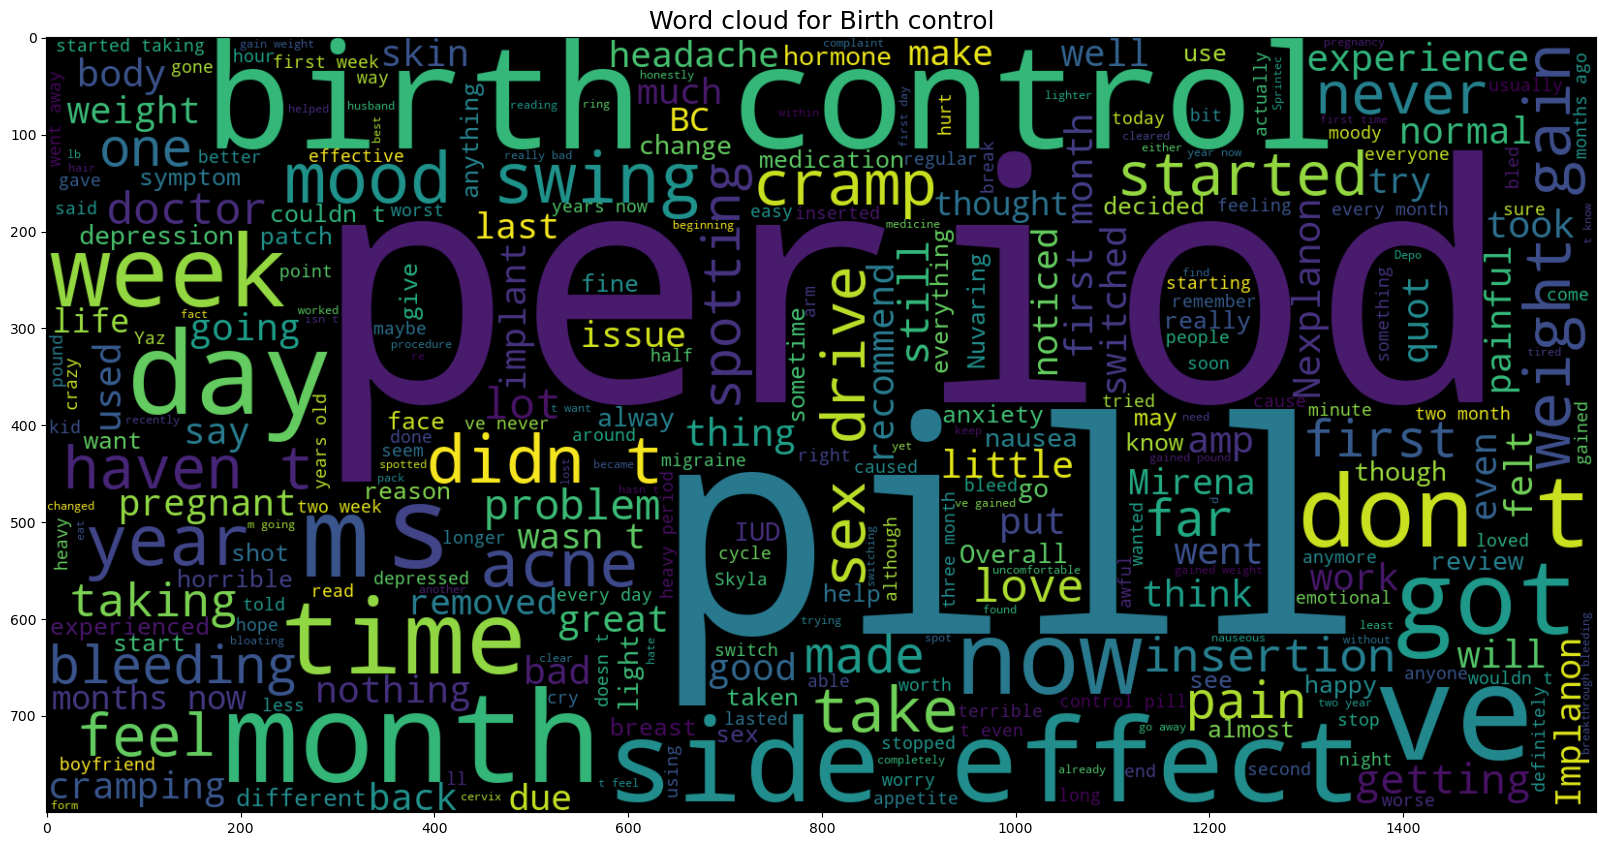

In [36]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 300 , width = 1600 , height = 800).generate(" ".join(words_BC.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=18)

Text(0.5, 1.0, 'Word cloud for Depression')

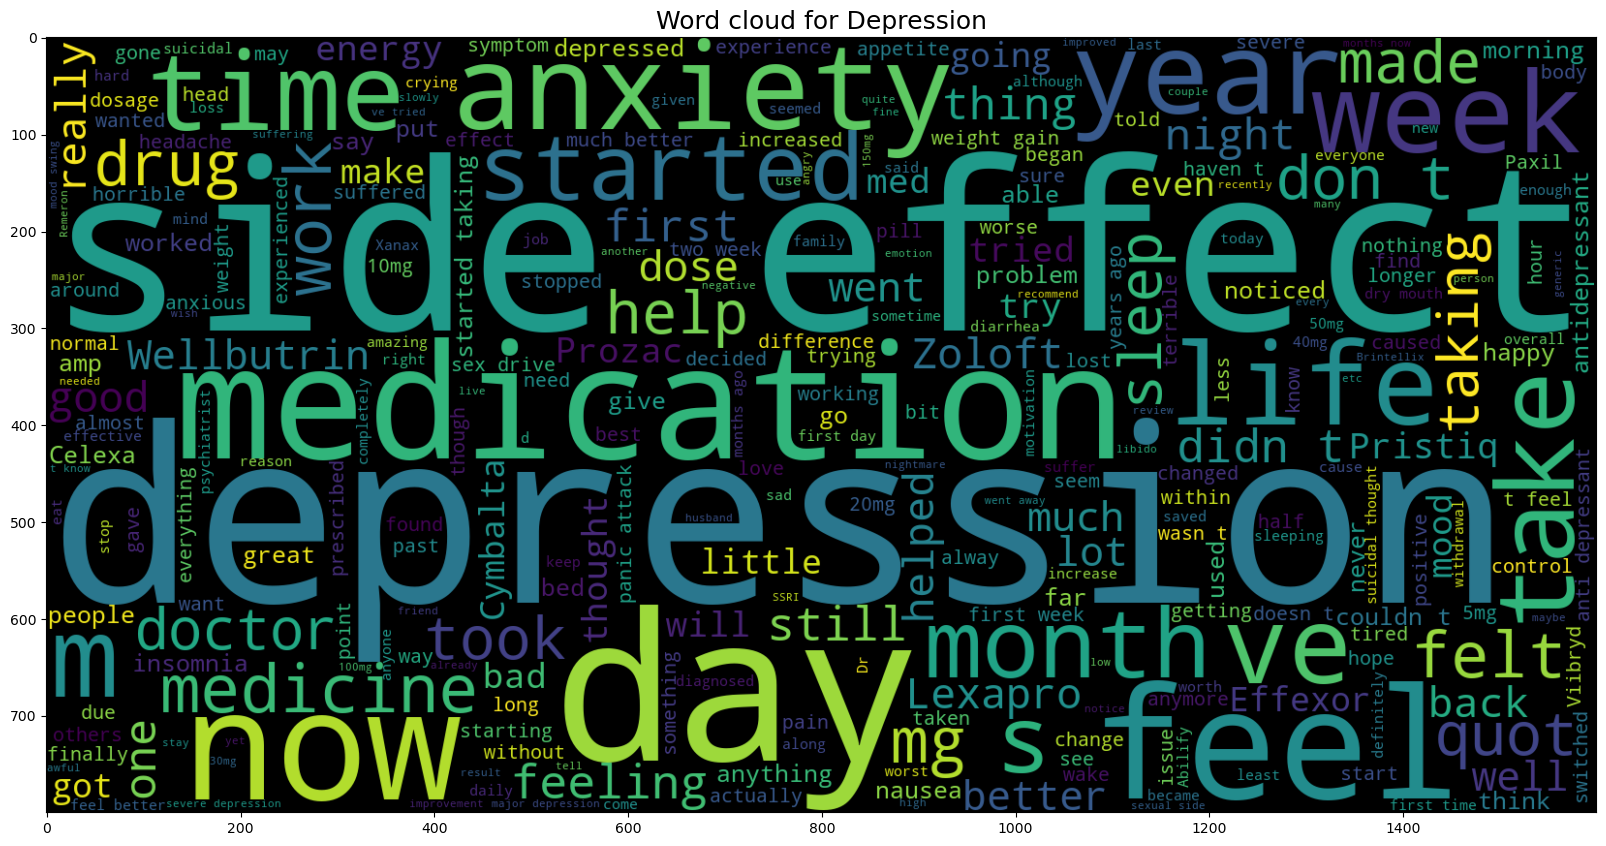

In [52]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 300 , width = 1600 , height = 800).generate(" ".join(words_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=18)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

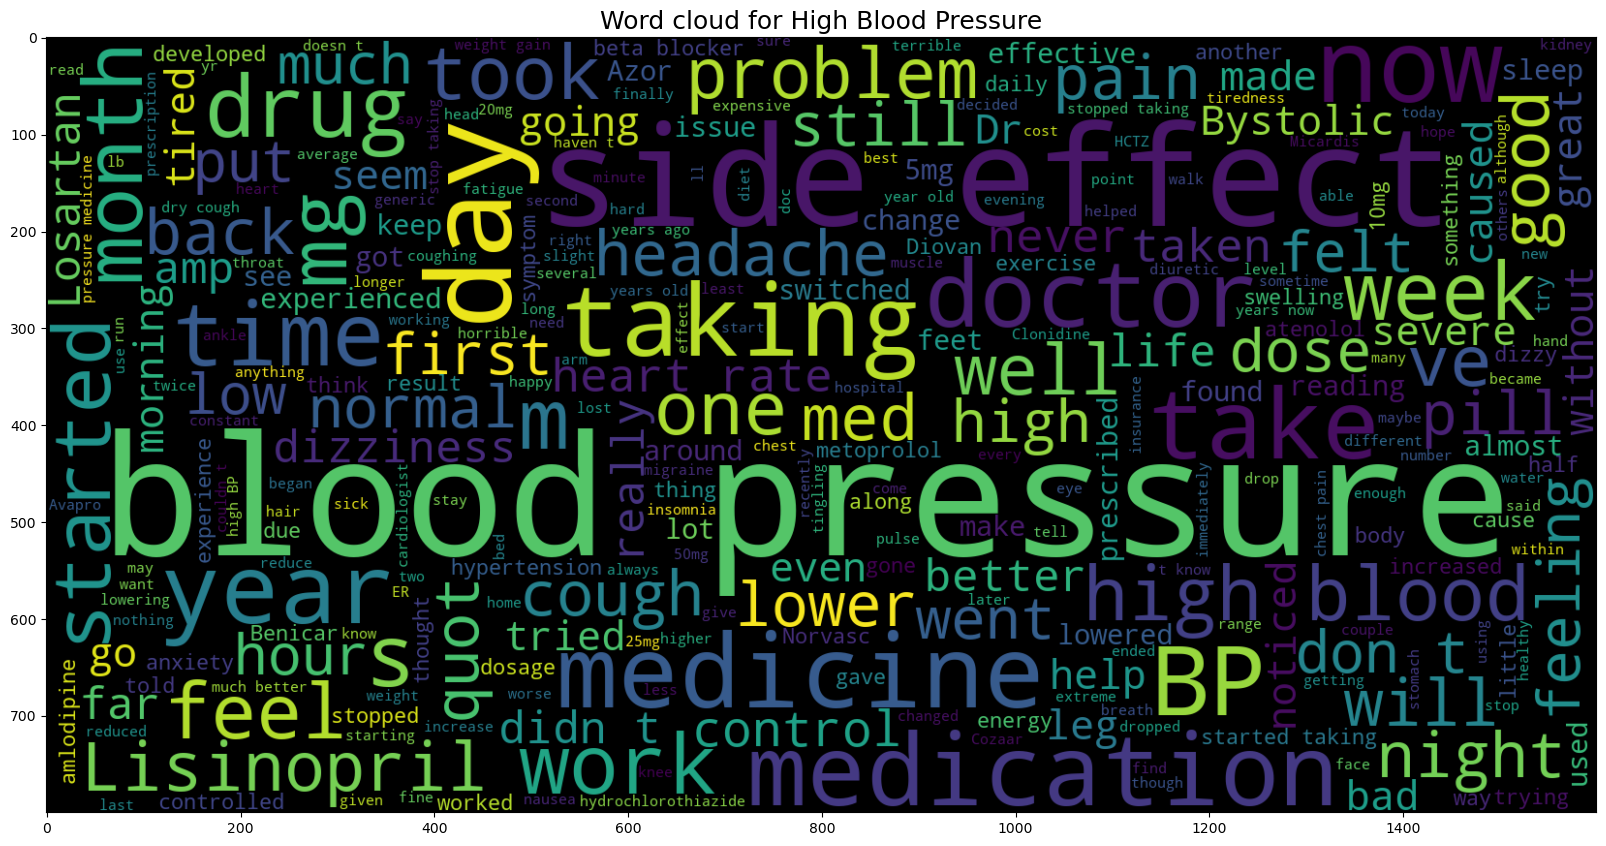

In [53]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 300 , width = 1600 , height = 800).generate(" ".join(words_BP.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=18)

Text(0.5, 1.0, 'Word cloud for Anxiety')

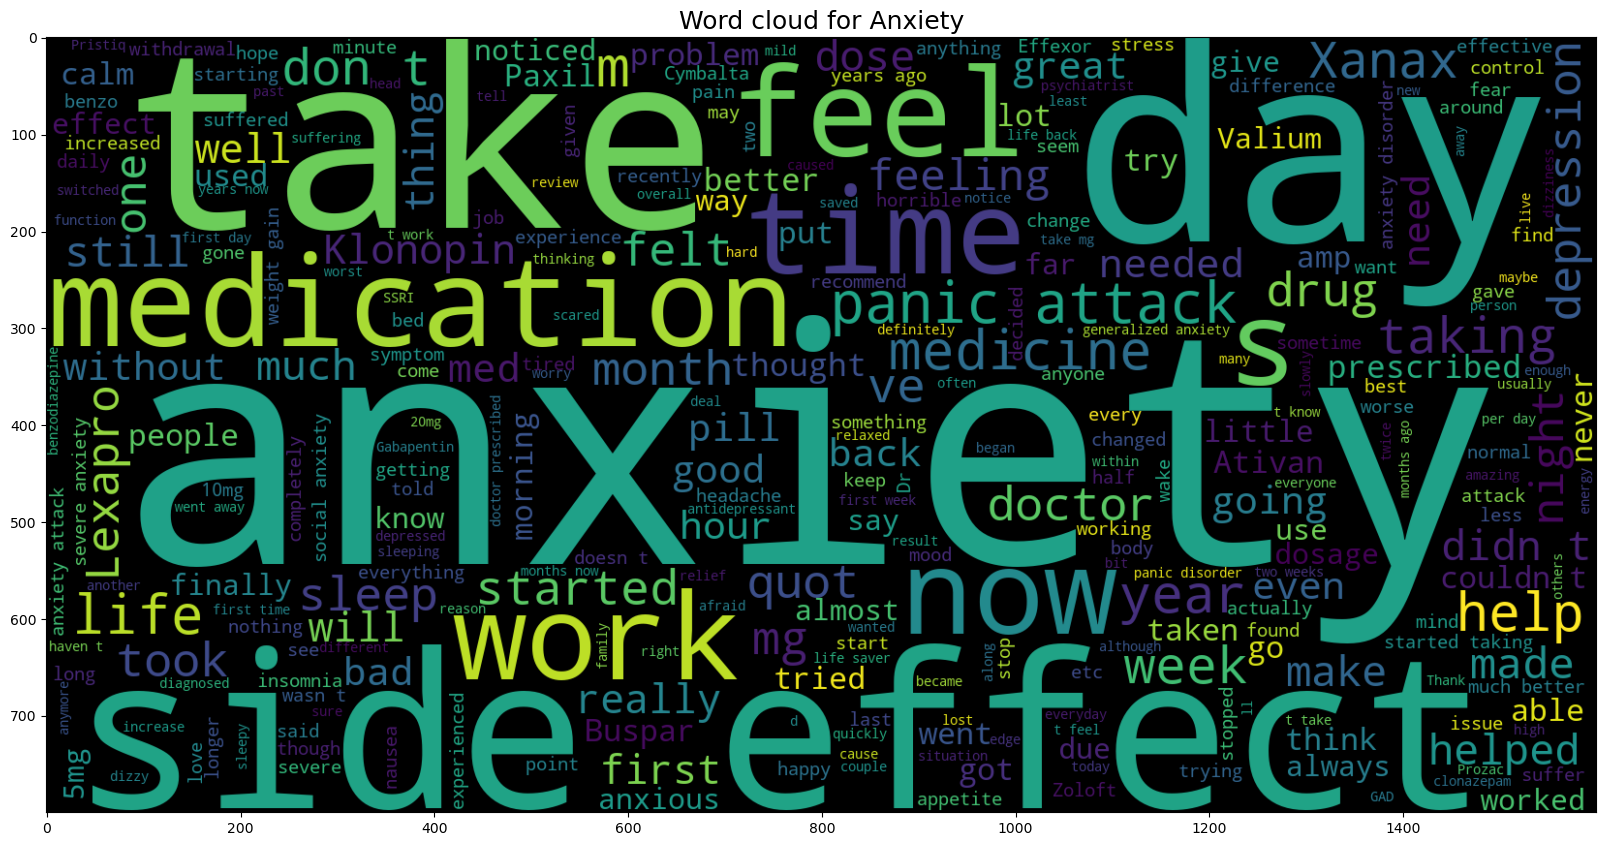

In [77]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 300 , width = 1600 , height = 800).generate(" ".join(words_An.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Anxiety',fontsize=18)

Text(0.5, 1.0, 'Word cloud for Weight Loss')

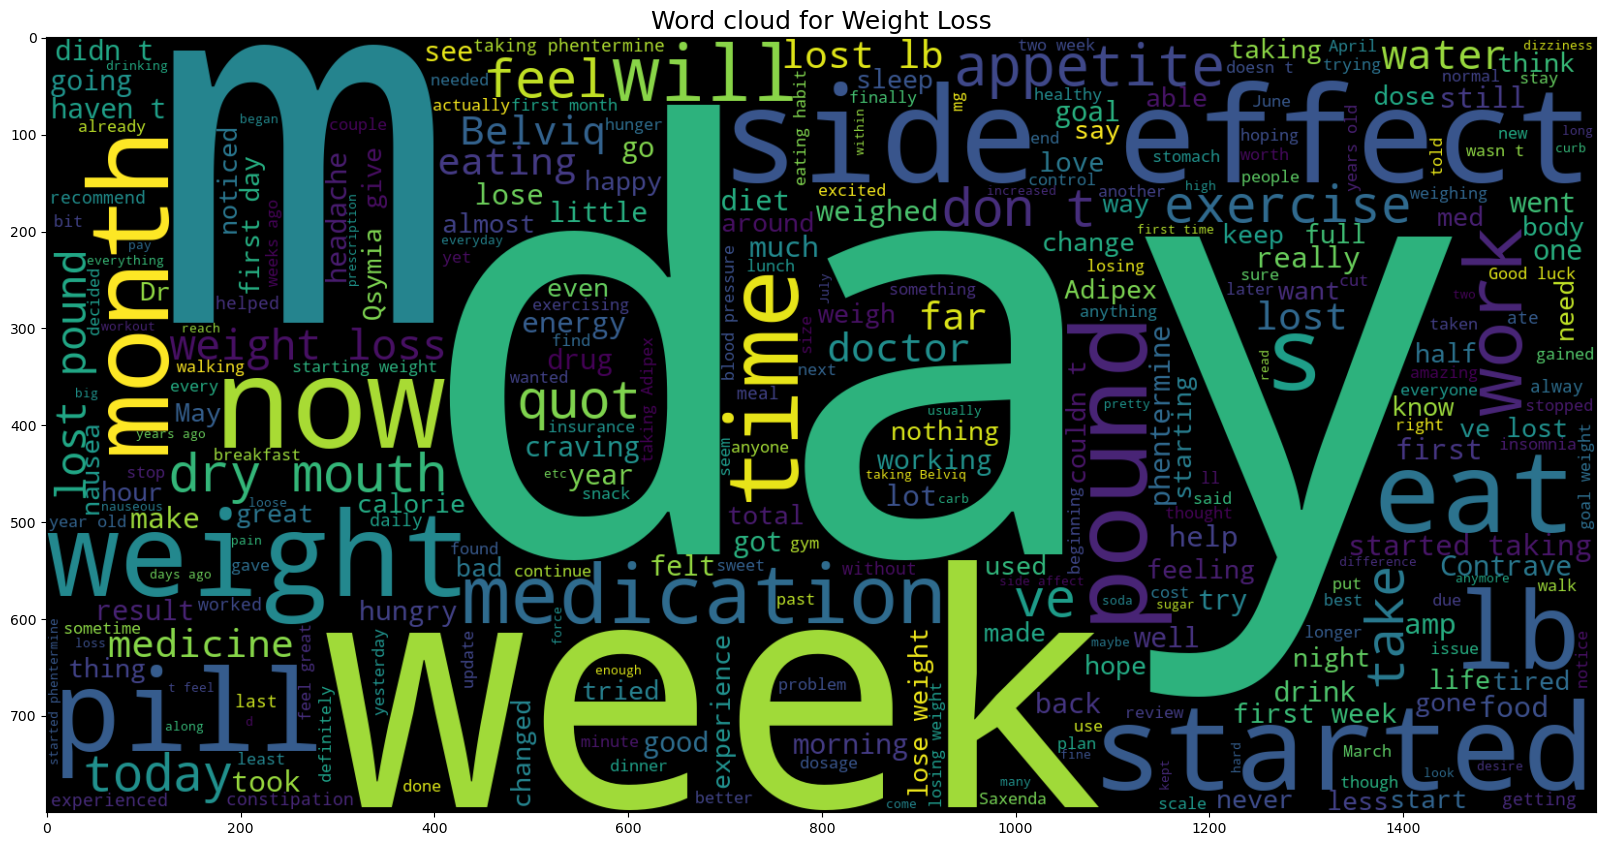

In [78]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 300 , width = 1600 , height = 800).generate(" ".join(words_WL.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Weight Loss',fontsize=18)

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

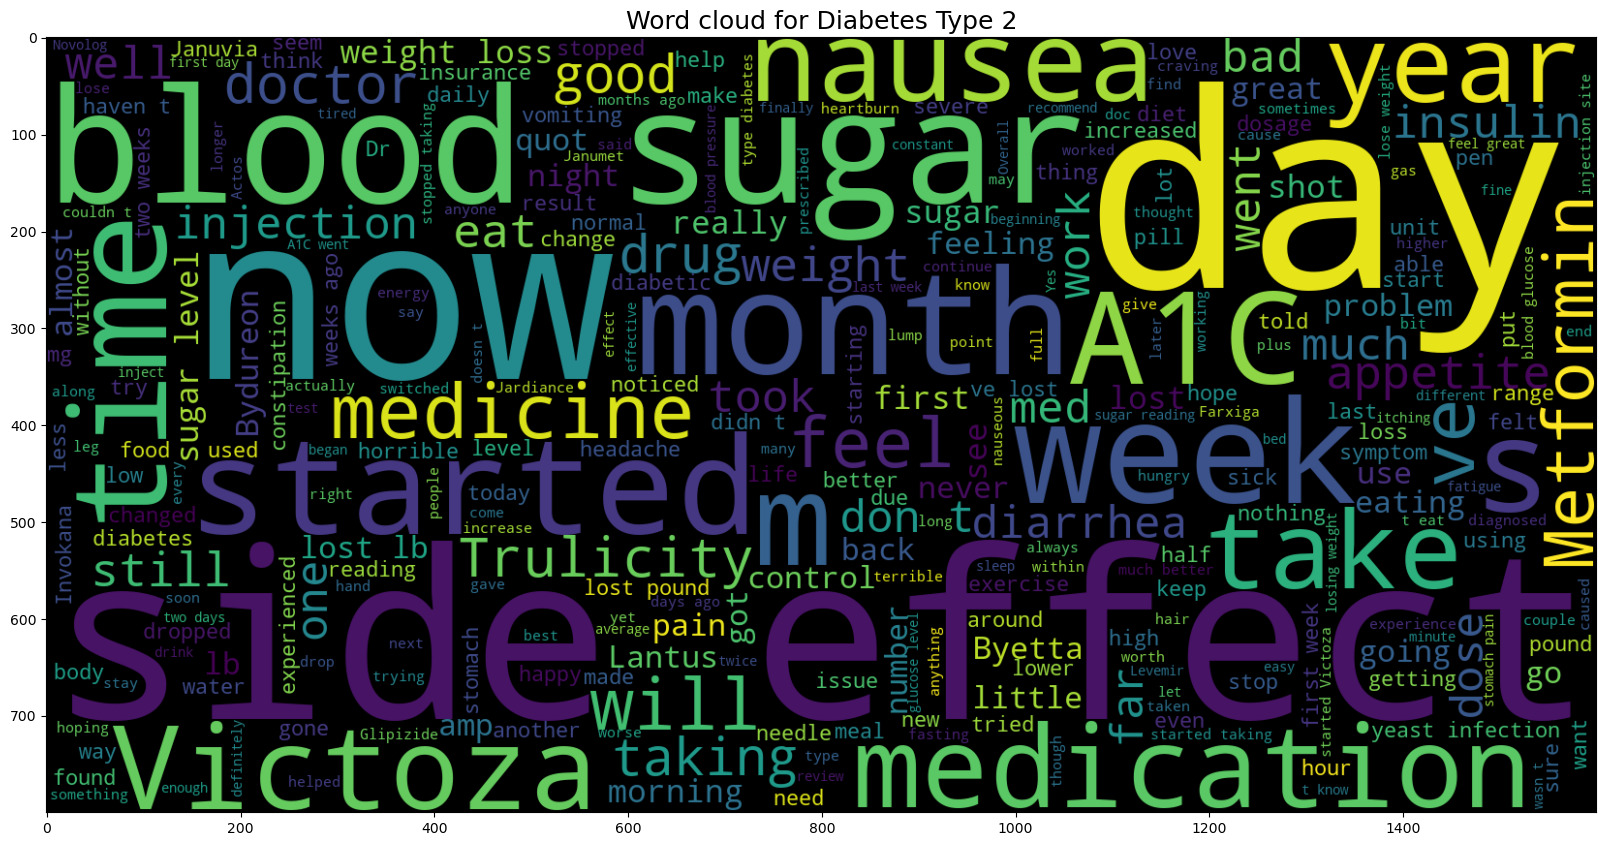

In [79]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 300 , width = 1600 , height = 800).generate(" ".join(words_DT.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=18)

# Model Building

In [37]:
df1.head()

drugName      condition  \
2                               Lybrel  Birth Control   
3                           Ortho Evra  Birth Control   
9   Ethinyl estradiol / levonorgestrel  Birth Control   
11                      L-methylfolate     Depression   
14                           Nexplanon  Birth Control   

                                               review  \
2   "I used to take another oral contraceptive, wh...   
3   "This is my first time using any form of birth...   
9   "I had been on the pill for many years. When m...   
11  "I have taken anti-depressants for years, with...   
14  "Started Nexplanon 2 months ago because I have...   

                                  preprocessed_Review  
2   oral contraceptive 21 pill cycle happy light p...  
3   time form birth control i 039 m glad go patch ...  
9   pill year doctor change rx chateal effective h...  
11  take anti depressant year improvement moderate...  
14  started nexplanon 2 month ago minimal contrace...

In [38]:
df1.tail()

drugName            condition  \
161278        Invokana     Diabetes, Type 2   
161286    Vortioxetine           Depression   
161287          Ativan              Anxiety   
161290        Tekturna  High Blood Pressure   
161291  Junel 1.5 / 30        Birth Control   

                                                   review  \
161278  "I just got diagnosed with type 2. My doctor p...   
161286  "This is the third med I&#039;ve tried for anx...   
161287  "I was super against taking medication. I&#039...   
161290  "I have only been on Tekturna for 9 days. The ...   
161291  "This would be my second month on Junel. I&#03...   

                                      preprocessed_Review  
161278  get diagnose type 2 doctor prescribe invokana ...  
161286  med i 039 ve try anxiety mild depression week ...  
161287  super take medication i 039 ve start deal anxi...  
161290  tekturna 9 day effect immediate calcium channe...  
161291  second month junel i 039 ve birth control 10 y...

In [39]:
x = df1["preprocessed_Review"]
y = df1["condition"]


In [40]:
x[2]

'oral contraceptive 21 pill cycle happy light period max 5 day effect contain hormone gestodene available switch lybrel ingredient similar pill end start lybrel immediately day period instruction say period last week take second pack week pack thing get worse period last week it 039 end week daily brown discharge positive didn 039 t effect idea period free tempting alas'

In [41]:
y[2]

'Birth Control'

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify= y, test_size=0.2, random_state=42)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(41796,)
(10449,)
(41796,)
(10449,)


In [44]:
y_train.value_counts()

condition
Birth Control          23031
Depression              7255
Anxiety                 4723
Weight Loss             2887
Diabetes, Type 2        2043
High Blood Pressure     1857
Name: count, dtype: int64

In [45]:
y_test.value_counts()

condition
Birth Control          5757
Depression             1814
Anxiety                1181
Weight Loss             722
Diabetes, Type 2        511
High Blood Pressure     464
Name: count, dtype: int64

## With Bigrams

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

## Using Navie Bayes & Bigram

In [84]:
from sklearn.naive_bayes import MultinomialNB

mlnb_model = MultinomialNB()
mlnb_model.fit(tfidf_train, y_train)

MultinomialNB()

#### Training Score For Navie Bayes

In [83]:
y_pred_train = mlnb_model.predict(tfidf_train)
acc_score =  metrics.accuracy_score(y_train, y_pred_train)
print(acc_score)

0.7403340032538999


#### Testing Score For Navie Bayes

In [85]:
y_pred_nb = mlnb_model.predict(tfidf_test)
acc_score =  metrics.accuracy_score(y_test, y_pred_nb)
print(acc_score)

0.6873385012919897


#### Confusion Matrix and Report For Test Data

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report,roc_curve,roc_auc_score
# Testing Confution Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Confusion Matrix:
[[ 262  599  320    0    0    0]
 [   0 5757    0    0    0    0]
 [   1  760 1053    0    0    0]
 [   0  484    4   21    0    2]
 [   2  415   19    0   28    0]
 [   0  657    4    0    0   61]]
Classification Report:
                     precision    recall  f1-score   support

            Anxiety       0.99      0.22      0.36      1181
      Birth Control       0.66      1.00      0.80      5757
         Depression       0.75      0.58      0.66      1814
   Diabetes, Type 2       1.00      0.04      0.08       511
High Blood Pressure       1.00      0.06      0.11       464
        Weight Loss       0.97      0.08      0.16       722

           accuracy                           0.69     10449
          macro avg       0.90      0.33      0.36     10449
       weighted avg       0.77      0.69      0.61     10449



##### Accuracy Score For Navie Bayes model Is not good so moving forword with other models 
Testing Accuracy = 69%
Training Accuracy = 74%

## Using Random Forest Classifier & Bigram

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

base_model = RandomForestClassifier()
base_model.fit(tfidf_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = base_model.predict(tfidf_test)
acc_score =  metrics.accuracy_score(y_test, y_pred)
print(acc_score)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report,roc_curve,roc_auc_score
# Testing Confution Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 900   46  225    0   10    0]
 [   1 5749    7    0    0    0]
 [  59  104 1643    1    5    2]
 [   3   55   14  416    3   20]
 [   9   59   57    0  336    3]
 [   2   65   18    0    3  634]]
Classification Report:
                     precision    recall  f1-score   support

            Anxiety       0.92      0.76      0.84      1181
      Birth Control       0.95      1.00      0.97      5757
         Depression       0.84      0.91      0.87      1814
   Diabetes, Type 2       1.00      0.81      0.90       511
High Blood Pressure       0.94      0.72      0.82       464
        Weight Loss       0.96      0.88      0.92       722

           accuracy                           0.93     10449
          macro avg       0.93      0.85      0.88     10449
       weighted avg       0.93      0.93      0.92     10449



In [79]:
y_pred_train = base_model.predict(tfidf_train)
acc_score =  metrics.accuracy_score(y_train, y_pred_train)
print(acc_score)

0.9991386735572783


In [80]:
# Training Confution Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_train))

Confusion Matrix:
[[ 4715     1     7     0     0     0]
 [    5 23024     2     0     0     0]
 [    8     2  7244     0     1     0]
 [    3     0     1  2039     0     0]
 [    2     0     2     0  1853     0]
 [    0     0     2     0     0  2885]]
Classification Report:
                     precision    recall  f1-score   support

            Anxiety       1.00      1.00      1.00      4723
      Birth Control       1.00      1.00      1.00     23031
         Depression       1.00      1.00      1.00      7255
   Diabetes, Type 2       1.00      1.00      1.00      2043
High Blood Pressure       1.00      1.00      1.00      1857
        Weight Loss       1.00      1.00      1.00      2887

           accuracy                           1.00     41796
          macro avg       1.00      1.00      1.00     41796
       weighted avg       1.00      1.00      1.00     41796



## With TFIDF

In [93]:
tfidf_vectorizer1 = TfidfVectorizer()
tfidf_train1 = tfidf_vectorizer1.fit_transform(x_train)
tfidf_test1 = tfidf_vectorizer1.transform(x_test)

## Using Navie Bayes & TFIDF

In [94]:
from sklearn.naive_bayes import MultinomialNB

mlnb_model1 = MultinomialNB()
mlnb_model1.fit(tfidf_train1, y_train)

MultinomialNB()

#### Testing Score For Navie Bayes

In [95]:
y_pred_nb = mlnb_model1.predict(tfidf_test1)
acc_score =  metrics.accuracy_score(y_test, y_pred_nb)
print(acc_score)

0.8351995406258972


#### Training Score For Navie Bayes

In [96]:
y_pred_train1 = mlnb_model1.predict(tfidf_train1)
acc_score =  metrics.accuracy_score(y_train, y_pred_train1)
print(acc_score)

0.8572351421188631


## Using Random Forest Classifier & TFIDF

In [109]:
base_model1 = RandomForestClassifier()
base_model1.fit(tfidf_train1, y_train)

RandomForestClassifier()

#### Testing Score For Random Forest

In [111]:
y_pred1 = base_model1.predict(tfidf_test1)
acc_score =  metrics.accuracy_score(y_test, y_pred1)
print(acc_score)

0.9373145755574697


#### Confusion Matrix and Report For Testing Data

In [112]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Confusion Matrix:
[[ 921   27  220    1   12    0]
 [   1 5745    9    0    2    0]
 [  66   67 1668    1    8    4]
 [   2   34   14  437    6   18]
 [   8   39   45    0  369    3]
 [   2   37   26    1    2  654]]
Classification Report:
                     precision    recall  f1-score   support

            Anxiety       0.92      0.78      0.84      1181
      Birth Control       0.97      1.00      0.98      5757
         Depression       0.84      0.92      0.88      1814
   Diabetes, Type 2       0.99      0.86      0.92       511
High Blood Pressure       0.92      0.80      0.86       464
        Weight Loss       0.96      0.91      0.93       722

           accuracy                           0.94     10449
          macro avg       0.93      0.88      0.90     10449
       weighted avg       0.94      0.94      0.94     10449



#### Inference:
   1. **Accuracy:** The overall accuracy of the model is 94%, indicating that 94% of the predictions made by the model are correct.
   2. **Precision:** Precision measures the accuracy of the positive predictions made by the model. For example, for the class "Anxiety", the precision is 0.92, meaning that 92% of the instances predicted as "Anxiety" by the model were actually "Anxiety".
   3. **Recall:** Recall measures the ability of the model to correctly identify instances of a class. For example, for the class "Depression", the recall is 0.92, meaning that 92% of the actual instances of "Depression" were correctly identified by the model.
   4. **F1-score:** The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is useful when classes are imbalanced.
   
Overall, the model performs well with high precision, recall, and F1-score values for most classes, indicating good predictive performance across multiple classes. However, there are some variations in performance across classes, as indicated by differences in precision, recall, and F1-score values.

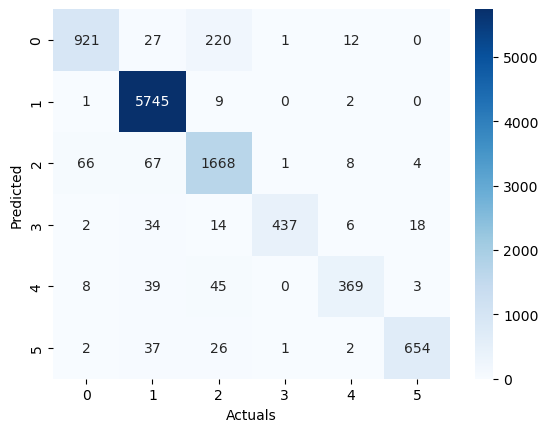

In [133]:
sns.heatmap(confusion_matrix(y_test, y_pred1), cmap='Blues',annot=True,fmt='.5g')
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.show()

### AUC and ROC for the training data

In [152]:
sns.set(style="darkgrid")

In [151]:
from sklearn.metrics import roc_auc_score

# Assuming base_model is your trained Random Forest classifier
probs = base_model1.predict_proba(tfidf_test1)  # Predicted probabilities for all classes

# Define class labels
classes = ["Anxiety","Birth Control", "Depression", "Diabetes, Type 2", "High Blood Pressure", "Weight Loss"]

# Calculate AUC for each class
aucs = []
for i in range(len(classes)):
    auc_i = roc_auc_score((y_test == classes[i]).astype(int), probs[:, i])
    aucs.append(auc_i)

# Average AUC across all classes
mean_auc = np.mean(aucs)
print(aucs)
print('Mean AUC: %.3f' % mean_auc)

[0.9906034055248966, 0.9994424667934554, 0.990058280542062, 0.9945983099128489, 0.9920997876124532, 0.9975473074205591]
Mean AUC: 0.994


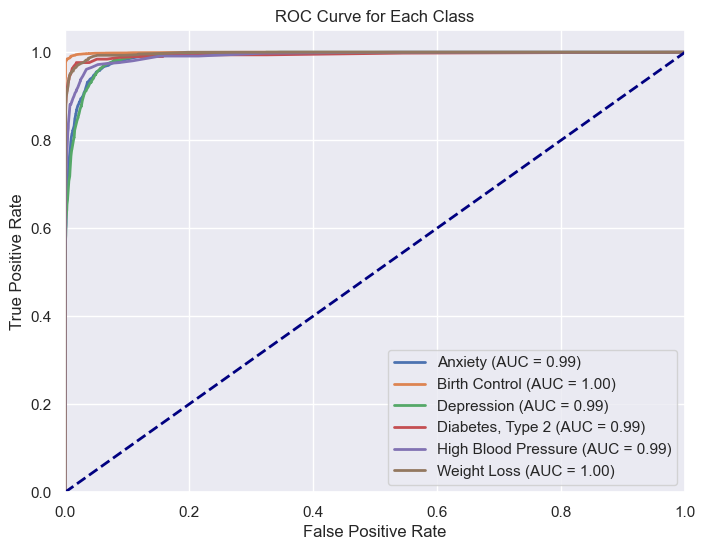

In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve((y_test == classes[i]).astype(int), probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (classes[i], roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


#### Training Score For Random Forest

In [71]:
y_pred_train1 = base_model.predict(tfidf_train1)
acc_score =  metrics.accuracy_score(y_train, y_pred_train1)
print(acc_score)

0.9991386735572783


#### Confusion Matrix and Report For Training Data

In [72]:
# Training Confution Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_train))

Confusion Matrix:
[[ 4715     1     7     0     0     0]
 [    5 23024     2     0     0     0]
 [    8     2  7244     0     1     0]
 [    3     0     1  2039     0     0]
 [    2     0     2     0  1853     0]
 [    0     0     2     0     0  2885]]
Classification Report:
                     precision    recall  f1-score   support

            Anxiety       1.00      1.00      1.00      4723
      Birth Control       1.00      1.00      1.00     23031
         Depression       1.00      1.00      1.00      7255
   Diabetes, Type 2       1.00      1.00      1.00      2043
High Blood Pressure       1.00      1.00      1.00      1857
        Weight Loss       1.00      1.00      1.00      2887

           accuracy                           1.00     41796
          macro avg       1.00      1.00      1.00     41796
       weighted avg       1.00      1.00      1.00     41796



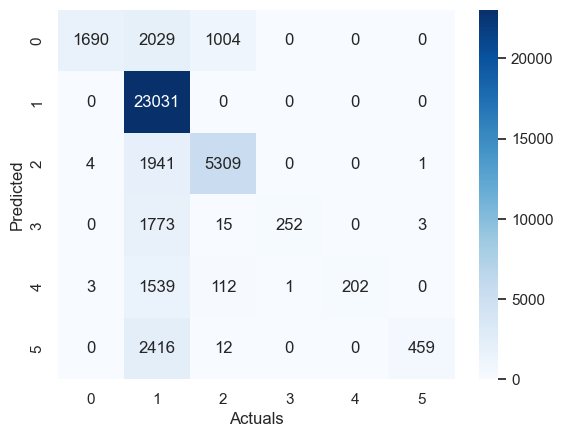

In [157]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), cmap='Blues',annot=True,fmt='.5g')
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.show()

### AUC and ROC For Testing Data

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Assuming base_model is your trained Random Forest classifier
probs = base_model1.predict_proba(tfidf_train1)  # Predicted probabilities for all classes

# Define class labels
classes = ["Anxiety","Birth Control", "Depression", "Diabetes, Type 2", "High Blood Pressure", "Weight Loss"]

# Calculate AUC for each class
aucs = []
for i in range(len(classes)):
    auc_i = roc_auc_score((y_train == classes[i]).astype(int), probs[:, i])
    aucs.append(auc_i)

# Average AUC across all classes
print(aucs)
mean_auc = np.mean(aucs)
print('Mean AUC: %.3f' % mean_auc)

[0.999995867975778, 0.9999943379642747, 0.9999875835489186, 0.9999965523771058, 0.999982842709661, 0.9999989005636174]
Mean AUC: 1.000


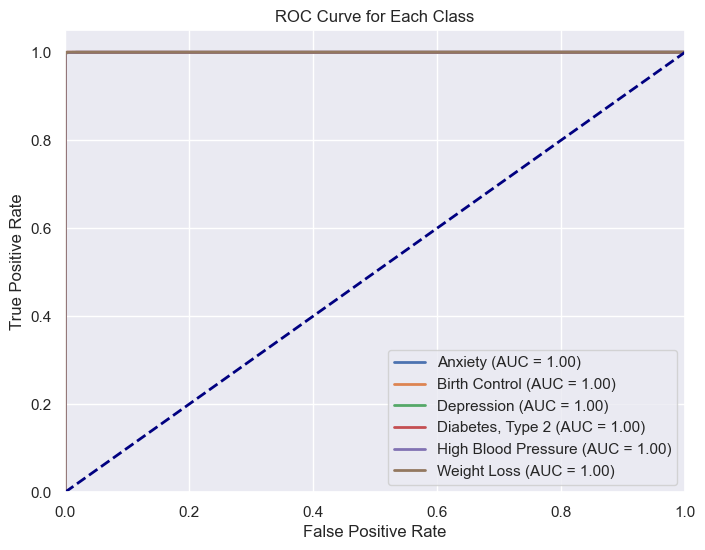

In [156]:
#  Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve((y_train == classes[i]).astype(int), probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (classes[i], roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


## Testing The Model Prediction

### Checking With Training Data

In [185]:
x_train.head(4)

18940     excited try seasonique 4 period year i 039 ve ...
59587     mirena yesterday scream procedure kid assume h...
39585     start 277 lb 8 20 2014 doctor prescribe 37 5 m...
102471    doctor prescribe xanax get fire job verbally a...
Name: preprocessed_Review, dtype: object

In [187]:
x_train[59587]

'mirena yesterday scream procedure kid assume hurt cramp take easy ask numb haven 039 t effect nausea slight bleeding period stop second day hope fine weight gain acne'

In [188]:
y_train[59587]

'Birth Control'

### Raw Data

In [192]:
df1["review"][59587] 

'"I had my Mirena put in yesterday and it made me almost scream during the procedure. I have never had kids so I assume that is why it hurt. Since then I have only had cramping and have been taking it easy. If I could do it again I would have asked to be numbed. I haven&#039;t really had any side effects besides nausea and slight bleeding. But for the most part my period stopped on the second day.  I am hoping that I will be fine without the weight gain and acne."'

### Cleaning It and Predicting

In [193]:
val1 = df1["review"][59587]  # Raw Data
clean_val1 = preprocess(val1)
cleaned_val1 = preprocess1(clean_val1)
cleaned_val1

'mirena yesterday scream procedure kid assume hurt cramp take easy ask numb haven 039 t effect nausea slight bleeding period stop second day hope fine weight gain acne'

In [194]:
cleaned_tfidf1 = tfidf_vectorizer1.transform([cleaned_val1])
base_model1.predict(cleaned_tfidf1)

array(['Birth Control'], dtype=object)

### Checking With Unseen Data

In [183]:
val = """I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of 
      those helped with my depression,insomnia &amp; anxiety.My doctor suggested and changed me onto 45mg mirtazapine 
      and this medicine has saved my life.Thankfully I have had no side effects especially the most common - weight gain, 
      I&#039;ve actually lost alot of weight.I still have suicidal thoughts but mirtazapine has saved me."""
clean_val = preprocess(val)
cleaned_val = preprocess1(clean_val)
cleaned_val

'i 039 ve try antidepressant year citalopram fluoxetine amitriptyline help depression insomnia amp anxiety doctor suggest change 45 mg mirtazapine medicine save life thankfully effect especially common weight gain i 039 ve actually lose alot weight suicidal thought mirtazapine save'

In [191]:
cleaned_tfidf = tfidf_vectorizer1.transform([cleaned_val])
base_model1.predict(cleaned_tfidf)[0]

'Depression'